In [1]:
import pickle
with open('ROMS_26yr_daydic.pkl', 'rb') as file:
    daydic = pickle.load(file)

with open('ROMS_26yr_eddies.pkl', 'rb') as file:
    eddies = pickle.load(file)

import netCDF4 as nc
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import time

fname = '/srv/scratch/z3533156/26year_BRAN2020/outer_avg_01461.nc'
dataset = nc.Dataset(fname)
lon_rho  = dataset.variables['lon_rho'][:]
lon_rho = np.transpose(lon_rho, axes=(1, 0))
lat_rho  = dataset.variables['lat_rho'][:]
lat_rho = np.transpose(lat_rho, axes=(1, 0))
f  = dataset.variables['f'][:]
f = np.transpose(f, axes=(1, 0))
h = dataset.variables['h'][:]
h = np.transpose(h, axes=(1, 0))
z_r = np.load('/home/z5297792/UNSW-MRes/MRes/z_r/z_r.npy')
z_r = np.transpose(z_r, (1, 2, 0))
temp_ave = np.load('/srv/scratch/z5297792/Climatology/temp_ave.npy')
CurSpeed_ave = np.load('/srv/scratch/z5297792/Climatology/CurSpeed_ave.npy')


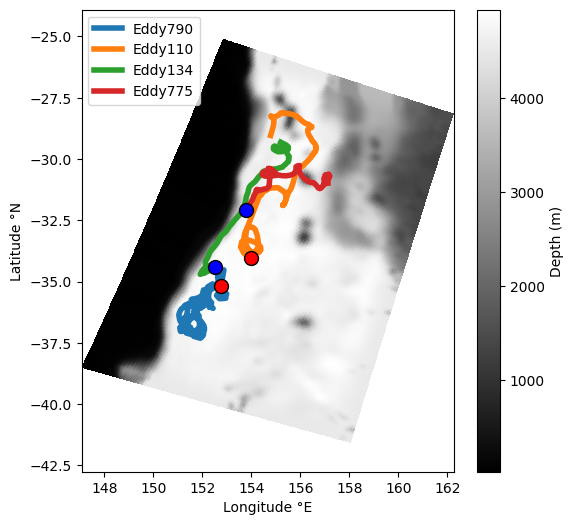

In [3]:
the_frontier_eddies = ['Eddy790', 'Eddy110', 'Eddy134', 'Eddy775']

colors = plt.get_cmap('tab10')
plt.figure(figsize=(6, 6))
plt.pcolormesh(lon_rho, lat_rho, h, shading='auto', cmap='gray')
plt.colorbar(label='Depth (m)')
plt.xlabel('Longitude °E')
plt.ylabel('Latitude °N')
for i, e in enumerate(the_frontier_eddies):
    eddy_data = eddies[e]
    plt.plot(eddy_data['Lon'], eddy_data['Lat'], color=colors(i), label=e, linewidth=4)
    plt.scatter(eddy_data['Lon'].iloc[-1], eddy_data['Lat'].iloc[-1], color='r' if eddy_data['Vort'].iloc[-1] > 0 else 'b', edgecolor='black', s=100, zorder=5)
plt.axis('equal')
plt.legend(loc='upper left')
plt.show()

In [17]:
with open('/srv/scratch/z5297792/Sample/frontier_sample_data.pkl', 'rb') as file:
    frontier_sample_data = pickle.load(file)
the_frontier_eddies = list(frontier_sample_data.keys())
print(the_frontier_eddies)

['Eddy790', 'Eddy110', 'Eddy134', 'Eddy775']


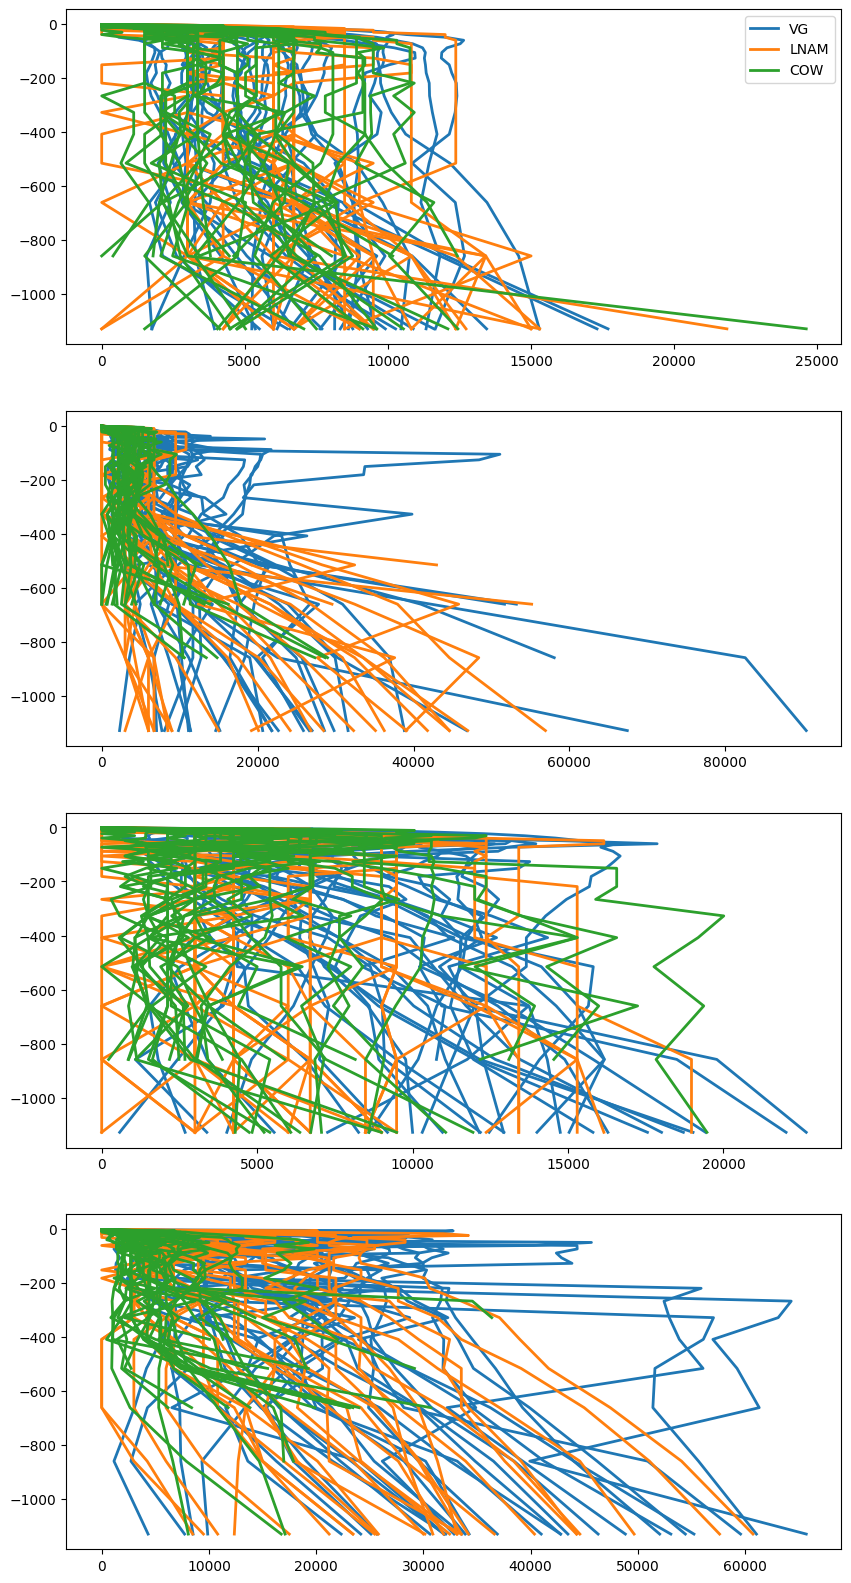

In [47]:
fig, axs = plt.subplots(4, 1, figsize=(10, 20), sharey=True)

method_colors = {method: plt.get_cmap('tab10')(i) for i, method in enumerate(['VG', 'LNAM', 'COW'])}
DEPTH_LVL_LIMIT = 23

for i, eddy in enumerate(the_frontier_eddies):
    for method, color in method_colors.items():
        for t in range(30):
            data = frontier_sample_data[eddy][f'T{t}'][method]
            x, y = data['x'].iloc[:DEPTH_LVL_LIMIT] - data.iloc[0]['x'], data['y'].iloc[:DEPTH_LVL_LIMIT] - data.iloc[0]['y']
            D = np.hypot(x, y)
            label = method if t == 0 else None
            axs[i].plot(D, data['Depth'].iloc[:DEPTH_LVL_LIMIT], color=color, linewidth=2, label=label)

axs[0].legend(loc='upper right')

plt.show()

